In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: BG
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


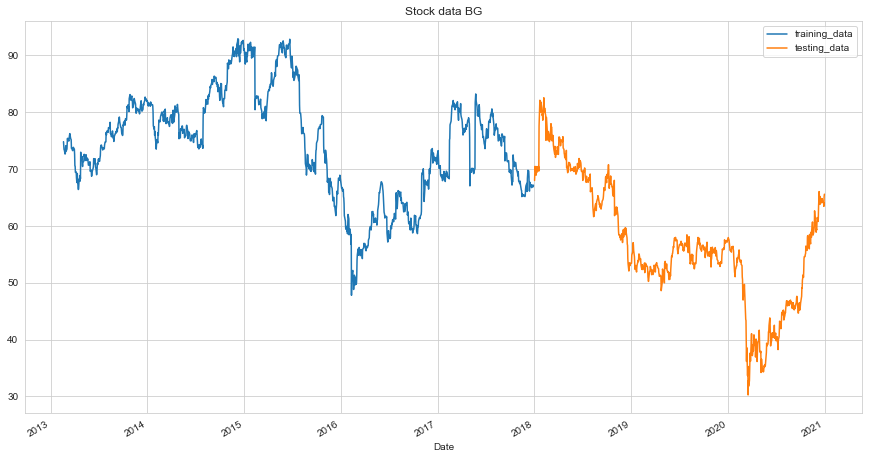

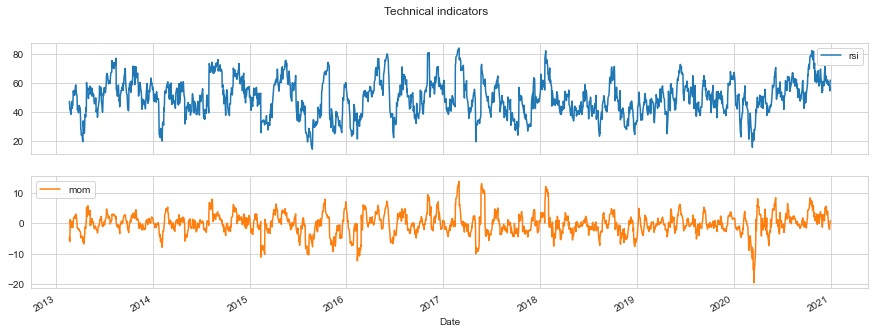

In [2]:
stock_name = 'bg'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1119.78, duration: 0:00:00.208053
episode: 2/2000, episode end value: 1310.09, duration: 0:00:00.203049
episode: 3/2000, episode end value: 1104.91, duration: 0:00:00.219035
episode: 4/2000, episode end value: 1194.49, duration: 0:00:00.220057
episode: 5/2000, episode end value: 1126.32, duration: 0:00:00.226053
episode: 6/2000, episode end value: 1160.93, duration: 0:00:00.207054
episode: 7/2000, episode end value: 1162.34, duration: 0:00:00.197029
episode: 8/2000, episode end value: 1113.02, duration: 0:00:00.197045
episode: 9/2000, episode end value: 1164.62, duration: 0:00:00.193059
episode: 10/2000, episode end value: 1116.04, duration: 0:00:00.191024
episode: 11/2000, episode end value: 1101.71, duration: 0:00:00.189048
episode: 12/2000, episode end value: 1107.46, duration: 0:00:00.200043
episode: 13/2000, episode end value: 1097.78, duration: 0:00:00.191043
episode: 14/2000, episode end value: 1128.45, duration: 0:00:00.194031
episode: 15/200

episode: 117/2000, episode end value: 1027.78, duration: 0:00:00.199047
episode: 118/2000, episode end value: 1135.47, duration: 0:00:00.197041
episode: 119/2000, episode end value: 1114.41, duration: 0:00:00.213051
episode: 120/2000, episode end value: 1178.91, duration: 0:00:00.226048
episode: 121/2000, episode end value: 1087.45, duration: 0:00:00.218047
episode: 122/2000, episode end value: 1108.34, duration: 0:00:00.229054
episode: 123/2000, episode end value: 1164.54, duration: 0:00:00.227059
episode: 124/2000, episode end value: 1169.98, duration: 0:00:00.220040
episode: 125/2000, episode end value: 1097.33, duration: 0:00:00.219057
episode: 126/2000, episode end value: 1131.86, duration: 0:00:00.234064
episode: 127/2000, episode end value: 1079.52, duration: 0:00:00.201045
episode: 128/2000, episode end value: 1198.69, duration: 0:00:00.213041
episode: 129/2000, episode end value: 1092.68, duration: 0:00:00.202065
episode: 130/2000, episode end value: 1109.31, duration: 0:00:00

episode: 231/2000, episode end value: 1153.92, duration: 0:00:00.272063
episode: 232/2000, episode end value: 1037.17, duration: 0:00:00.227051
episode: 233/2000, episode end value: 1060.32, duration: 0:00:00.220051
episode: 234/2000, episode end value: 1068.13, duration: 0:00:00.214047
episode: 235/2000, episode end value: 1123.29, duration: 0:00:00.276062
episode: 236/2000, episode end value: 1023.38, duration: 0:00:00.266058
episode: 237/2000, episode end value: 1051.33, duration: 0:00:00.260055
episode: 238/2000, episode end value: 1045.18, duration: 0:00:00.282064
episode: 239/2000, episode end value: 1119.30, duration: 0:00:00.229048
episode: 240/2000, episode end value: 1077.74, duration: 0:00:00.202046
episode: 241/2000, episode end value: 1058.94, duration: 0:00:00.230054
episode: 242/2000, episode end value: 1035.68, duration: 0:00:00.226054
episode: 243/2000, episode end value: 1043.09, duration: 0:00:00.221045
episode: 244/2000, episode end value: 1075.64, duration: 0:00:00

episode: 345/2000, episode end value: 1128.65, duration: 0:00:00.275063
episode: 346/2000, episode end value: 1175.51, duration: 0:00:00.300068
episode: 347/2000, episode end value: 1159.92, duration: 0:00:00.281065
episode: 348/2000, episode end value: 1010.62, duration: 0:00:00.220043
episode: 349/2000, episode end value: 1149.48, duration: 0:00:00.272060
episode: 350/2000, episode end value: 1051.22, duration: 0:00:00.293065
episode: 351/2000, episode end value: 1056.26, duration: 0:00:00.277065
episode: 352/2000, episode end value: 1161.17, duration: 0:00:00.350079
episode: 353/2000, episode end value: 1133.27, duration: 0:00:00.353076
episode: 354/2000, episode end value: 1062.62, duration: 0:00:00.270061
episode: 355/2000, episode end value: 1066.02, duration: 0:00:00.248055
episode: 356/2000, episode end value: 1129.81, duration: 0:00:00.316070
episode: 357/2000, episode end value: 1069.26, duration: 0:00:00.348079
episode: 358/2000, episode end value: 1184.17, duration: 0:00:00

episode: 459/2000, episode end value: 1123.24, duration: 0:00:00.363087
episode: 460/2000, episode end value: 1131.03, duration: 0:00:00.365082
episode: 461/2000, episode end value: 1178.47, duration: 0:00:00.341076
episode: 462/2000, episode end value: 1185.90, duration: 0:00:00.338077
episode: 463/2000, episode end value: 1096.36, duration: 0:00:00.423096
episode: 464/2000, episode end value: 1142.44, duration: 0:00:00.398088
episode: 465/2000, episode end value: 1109.46, duration: 0:00:00.357078
episode: 466/2000, episode end value: 1140.39, duration: 0:00:00.414087
episode: 467/2000, episode end value: 1169.76, duration: 0:00:00.402090
episode: 468/2000, episode end value: 1097.99, duration: 0:00:00.375083
episode: 469/2000, episode end value: 1192.73, duration: 0:00:00.386088
episode: 470/2000, episode end value: 1108.53, duration: 0:00:00.398083
episode: 471/2000, episode end value: 1098.57, duration: 0:00:00.432100
episode: 472/2000, episode end value: 1178.18, duration: 0:00:00

episode: 573/2000, episode end value: 1131.31, duration: 0:00:00.420101
episode: 574/2000, episode end value: 1144.91, duration: 0:00:00.401086
episode: 575/2000, episode end value: 1017.18, duration: 0:00:00.447102
episode: 576/2000, episode end value: 1142.28, duration: 0:00:00.500114
episode: 577/2000, episode end value: 1154.18, duration: 0:00:00.469107
episode: 578/2000, episode end value: 1158.02, duration: 0:00:00.486109
episode: 579/2000, episode end value: 1084.50, duration: 0:00:00.422095
episode: 580/2000, episode end value: 1158.29, duration: 0:00:00.346077
episode: 581/2000, episode end value: 1106.68, duration: 0:00:00.451097
episode: 582/2000, episode end value: 1087.03, duration: 0:00:00.396090
episode: 583/2000, episode end value: 1099.63, duration: 0:00:00.414092
episode: 584/2000, episode end value: 1133.39, duration: 0:00:00.468105
episode: 585/2000, episode end value: 1224.56, duration: 0:00:00.399091
episode: 586/2000, episode end value: 1084.89, duration: 0:00:00

episode: 687/2000, episode end value: 1171.64, duration: 0:00:00.398086
episode: 688/2000, episode end value: 1009.35, duration: 0:00:00.325074
episode: 689/2000, episode end value: 1129.10, duration: 0:00:00.337074
episode: 690/2000, episode end value: 1007.59, duration: 0:00:00.309072
episode: 691/2000, episode end value: 1059.44, duration: 0:00:00.271055
episode: 692/2000, episode end value: 1096.69, duration: 0:00:00.357080
episode: 693/2000, episode end value: 1025.89, duration: 0:00:00.314071
episode: 694/2000, episode end value: 988.86, duration: 0:00:00.340076
episode: 695/2000, episode end value: 1073.17, duration: 0:00:00.321070
episode: 696/2000, episode end value: 1090.22, duration: 0:00:00.382087
episode: 697/2000, episode end value: 1054.47, duration: 0:00:00.367081
episode: 698/2000, episode end value: 1082.59, duration: 0:00:00.382084
episode: 699/2000, episode end value: 1103.61, duration: 0:00:00.438096
episode: 700/2000, episode end value: 1142.08, duration: 0:00:00.

episode: 801/2000, episode end value: 1131.05, duration: 0:00:00.361082
episode: 802/2000, episode end value: 1183.83, duration: 0:00:00.398090
episode: 803/2000, episode end value: 1181.94, duration: 0:00:00.429099
episode: 804/2000, episode end value: 1177.15, duration: 0:00:00.403091
episode: 805/2000, episode end value: 1005.26, duration: 0:00:00.348080
episode: 806/2000, episode end value: 1013.52, duration: 0:00:00.351082
episode: 807/2000, episode end value: 1125.01, duration: 0:00:00.265057
episode: 808/2000, episode end value: 1065.31, duration: 0:00:00.299067
episode: 809/2000, episode end value: 1094.21, duration: 0:00:00.356083
episode: 810/2000, episode end value: 1069.16, duration: 0:00:00.338075
episode: 811/2000, episode end value: 1064.83, duration: 0:00:00.330074
episode: 812/2000, episode end value: 1111.48, duration: 0:00:00.320071
episode: 813/2000, episode end value: 1084.69, duration: 0:00:00.382091
episode: 814/2000, episode end value: 1168.47, duration: 0:00:00

episode: 915/2000, episode end value: 996.76, duration: 0:00:00.318074
episode: 916/2000, episode end value: 1066.52, duration: 0:00:00.271060
episode: 917/2000, episode end value: 1071.70, duration: 0:00:00.351081
episode: 918/2000, episode end value: 1127.90, duration: 0:00:00.396086
episode: 919/2000, episode end value: 1058.54, duration: 0:00:00.370084
episode: 920/2000, episode end value: 1096.74, duration: 0:00:00.439096
episode: 921/2000, episode end value: 1106.31, duration: 0:00:00.343079
episode: 922/2000, episode end value: 1164.45, duration: 0:00:00.413092
episode: 923/2000, episode end value: 1063.11, duration: 0:00:00.384088
episode: 924/2000, episode end value: 1179.80, duration: 0:00:00.441099
episode: 925/2000, episode end value: 1156.75, duration: 0:00:00.427096
episode: 926/2000, episode end value: 1054.25, duration: 0:00:00.331076
episode: 927/2000, episode end value: 1162.82, duration: 0:00:00.380083
episode: 928/2000, episode end value: 1177.79, duration: 0:00:00.

episode: 1029/2000, episode end value: 1201.24, duration: 0:00:00.488108
episode: 1030/2000, episode end value: 1154.74, duration: 0:00:00.461102
episode: 1031/2000, episode end value: 1088.70, duration: 0:00:00.318071
episode: 1032/2000, episode end value: 1051.85, duration: 0:00:00.356080
episode: 1033/2000, episode end value: 1163.18, duration: 0:00:00.433096
episode: 1034/2000, episode end value: 1109.90, duration: 0:00:00.345075
episode: 1035/2000, episode end value: 1040.94, duration: 0:00:00.404093
episode: 1036/2000, episode end value: 1122.93, duration: 0:00:00.367077
episode: 1037/2000, episode end value: 1119.75, duration: 0:00:00.395086
episode: 1038/2000, episode end value: 1078.12, duration: 0:00:00.383092
episode: 1039/2000, episode end value: 1030.54, duration: 0:00:00.406089
episode: 1040/2000, episode end value: 1046.24, duration: 0:00:00.336079
episode: 1041/2000, episode end value: 1112.44, duration: 0:00:00.389089
episode: 1042/2000, episode end value: 1159.05, dur

episode: 1142/2000, episode end value: 1133.01, duration: 0:00:00.388085
episode: 1143/2000, episode end value: 1197.50, duration: 0:00:00.336077
episode: 1144/2000, episode end value: 1100.80, duration: 0:00:00.358082
episode: 1145/2000, episode end value: 1103.81, duration: 0:00:00.399089
episode: 1146/2000, episode end value: 1149.02, duration: 0:00:00.461103
episode: 1147/2000, episode end value: 1149.08, duration: 0:00:00.365081
episode: 1148/2000, episode end value: 1061.98, duration: 0:00:00.346081
episode: 1149/2000, episode end value: 1149.18, duration: 0:00:00.394090
episode: 1150/2000, episode end value: 1045.06, duration: 0:00:00.444100
episode: 1151/2000, episode end value: 1117.10, duration: 0:00:00.458106
episode: 1152/2000, episode end value: 1115.02, duration: 0:00:00.411090
episode: 1153/2000, episode end value: 1161.29, duration: 0:00:00.352080
episode: 1154/2000, episode end value: 1184.76, duration: 0:00:00.419094
episode: 1155/2000, episode end value: 1153.32, dur

episode: 1255/2000, episode end value: 1189.09, duration: 0:00:00.367088
episode: 1256/2000, episode end value: 1019.95, duration: 0:00:00.397087
episode: 1257/2000, episode end value: 1147.80, duration: 0:00:00.399090
episode: 1258/2000, episode end value: 1110.27, duration: 0:00:00.335074
episode: 1259/2000, episode end value: 1052.36, duration: 0:00:00.384088
episode: 1260/2000, episode end value: 1046.70, duration: 0:00:00.402092
episode: 1261/2000, episode end value: 1116.43, duration: 0:00:00.345075
episode: 1262/2000, episode end value: 1095.32, duration: 0:00:00.396096
episode: 1263/2000, episode end value: 1110.18, duration: 0:00:00.470100
episode: 1264/2000, episode end value: 1095.07, duration: 0:00:00.411093
episode: 1265/2000, episode end value: 1156.15, duration: 0:00:00.352080
episode: 1266/2000, episode end value: 1142.64, duration: 0:00:00.344076
episode: 1267/2000, episode end value: 1162.50, duration: 0:00:00.449098
episode: 1268/2000, episode end value: 1055.11, dur

episode: 1368/2000, episode end value: 1186.54, duration: 0:00:00.343073
episode: 1369/2000, episode end value: 1168.40, duration: 0:00:00.373084
episode: 1370/2000, episode end value: 1041.24, duration: 0:00:00.298067
episode: 1371/2000, episode end value: 1049.30, duration: 0:00:00.347083
episode: 1372/2000, episode end value: 1049.28, duration: 0:00:00.367078
episode: 1373/2000, episode end value: 1063.38, duration: 0:00:00.294065
episode: 1374/2000, episode end value: 1120.47, duration: 0:00:00.331076
episode: 1375/2000, episode end value: 1067.73, duration: 0:00:00.343079
episode: 1376/2000, episode end value: 997.45, duration: 0:00:00.345079
episode: 1377/2000, episode end value: 1076.98, duration: 0:00:00.352075
episode: 1378/2000, episode end value: 1088.85, duration: 0:00:00.300072
episode: 1379/2000, episode end value: 1035.84, duration: 0:00:00.314067
episode: 1380/2000, episode end value: 1137.03, duration: 0:00:00.385090
episode: 1381/2000, episode end value: 1042.22, dura

episode: 1481/2000, episode end value: 1127.08, duration: 0:00:00.387093
episode: 1482/2000, episode end value: 1163.07, duration: 0:00:00.358074
episode: 1483/2000, episode end value: 1090.84, duration: 0:00:00.369082
episode: 1484/2000, episode end value: 1119.37, duration: 0:00:00.409091
episode: 1485/2000, episode end value: 1174.71, duration: 0:00:00.334077
episode: 1486/2000, episode end value: 1196.31, duration: 0:00:00.388087
episode: 1487/2000, episode end value: 1159.73, duration: 0:00:00.411096
episode: 1488/2000, episode end value: 1118.89, duration: 0:00:00.454102
episode: 1489/2000, episode end value: 1135.81, duration: 0:00:00.412091
episode: 1490/2000, episode end value: 1092.96, duration: 0:00:00.329079
episode: 1491/2000, episode end value: 1173.47, duration: 0:00:00.410087
episode: 1492/2000, episode end value: 1094.31, duration: 0:00:00.382085
episode: 1493/2000, episode end value: 1212.32, duration: 0:00:00.428091
episode: 1494/2000, episode end value: 1078.70, dur

episode: 1594/2000, episode end value: 1081.34, duration: 0:00:00.329071
episode: 1595/2000, episode end value: 1184.24, duration: 0:00:00.406092
episode: 1596/2000, episode end value: 1074.53, duration: 0:00:00.339077
episode: 1597/2000, episode end value: 1041.52, duration: 0:00:00.398089
episode: 1598/2000, episode end value: 1094.02, duration: 0:00:00.425095
episode: 1599/2000, episode end value: 1093.65, duration: 0:00:00.377088
episode: 1600/2000, episode end value: 1110.54, duration: 0:00:00.378086
episode: 1601/2000, episode end value: 1181.16, duration: 0:00:00.372087
episode: 1602/2000, episode end value: 1068.34, duration: 0:00:00.344076
episode: 1603/2000, episode end value: 1075.89, duration: 0:00:00.363080
episode: 1604/2000, episode end value: 1145.61, duration: 0:00:00.430095
episode: 1605/2000, episode end value: 1088.08, duration: 0:00:00.361081
episode: 1606/2000, episode end value: 1144.97, duration: 0:00:00.415099
episode: 1607/2000, episode end value: 1179.67, dur

episode: 1707/2000, episode end value: 1178.87, duration: 0:00:00.407088
episode: 1708/2000, episode end value: 1199.73, duration: 0:00:00.417094
episode: 1709/2000, episode end value: 1115.05, duration: 0:00:00.309072
episode: 1710/2000, episode end value: 1113.74, duration: 0:00:00.413092
episode: 1711/2000, episode end value: 1103.65, duration: 0:00:00.389090
episode: 1712/2000, episode end value: 998.64, duration: 0:00:00.270061
episode: 1713/2000, episode end value: 1089.58, duration: 0:00:00.347080
episode: 1714/2000, episode end value: 1099.86, duration: 0:00:00.337073
episode: 1715/2000, episode end value: 1119.36, duration: 0:00:00.385087
episode: 1716/2000, episode end value: 1094.94, duration: 0:00:00.382088
episode: 1717/2000, episode end value: 1175.16, duration: 0:00:00.419092
episode: 1718/2000, episode end value: 1086.24, duration: 0:00:00.348079
episode: 1719/2000, episode end value: 1101.57, duration: 0:00:00.393088
episode: 1720/2000, episode end value: 1149.86, dura

episode: 1820/2000, episode end value: 1179.76, duration: 0:00:00.403092
episode: 1821/2000, episode end value: 1125.74, duration: 0:00:00.319068
episode: 1822/2000, episode end value: 1121.28, duration: 0:00:00.373081
episode: 1823/2000, episode end value: 1107.12, duration: 0:00:00.338080
episode: 1824/2000, episode end value: 1172.99, duration: 0:00:00.500112
episode: 1825/2000, episode end value: 1084.03, duration: 0:00:00.393087
episode: 1826/2000, episode end value: 1084.52, duration: 0:00:00.434095
episode: 1827/2000, episode end value: 1176.36, duration: 0:00:00.372085
episode: 1828/2000, episode end value: 1163.22, duration: 0:00:00.347077
episode: 1829/2000, episode end value: 1096.02, duration: 0:00:00.406092
episode: 1830/2000, episode end value: 1071.75, duration: 0:00:00.352079
episode: 1831/2000, episode end value: 1170.26, duration: 0:00:00.370082
episode: 1832/2000, episode end value: 1151.01, duration: 0:00:00.360080
episode: 1833/2000, episode end value: 1149.05, dur

episode: 1933/2000, episode end value: 1122.15, duration: 0:00:00.435097
episode: 1934/2000, episode end value: 1151.06, duration: 0:00:00.376085
episode: 1935/2000, episode end value: 1143.43, duration: 0:00:00.403091
episode: 1936/2000, episode end value: 1157.55, duration: 0:00:00.413092
episode: 1937/2000, episode end value: 1187.71, duration: 0:00:00.384087
episode: 1938/2000, episode end value: 1116.72, duration: 0:00:00.331072
episode: 1939/2000, episode end value: 1062.91, duration: 0:00:00.364081
episode: 1940/2000, episode end value: 1127.37, duration: 0:00:00.388087
episode: 1941/2000, episode end value: 1090.40, duration: 0:00:00.453102
episode: 1942/2000, episode end value: 1149.33, duration: 0:00:00.363081
episode: 1943/2000, episode end value: 1062.96, duration: 0:00:00.332080
episode: 1944/2000, episode end value: 1186.00, duration: 0:00:00.389087
episode: 1945/2000, episode end value: 1112.31, duration: 0:00:00.395087
episode: 1946/2000, episode end value: 1126.52, dur

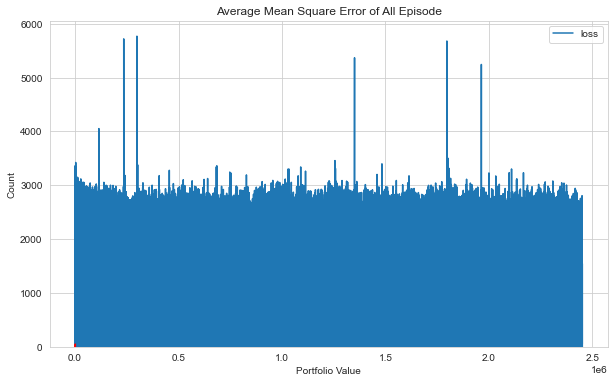

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

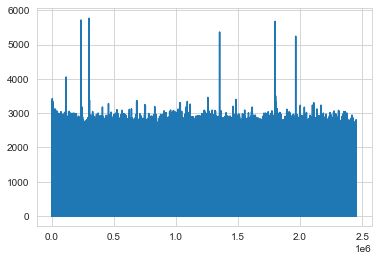

In [5]:
plt.plot(agent.model.losses)

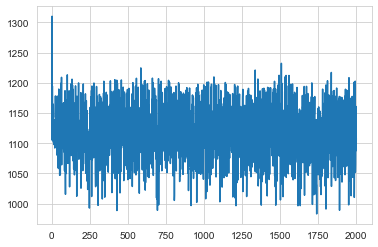

In [6]:
plt.plot(portfolio_value)

episode end value: 1117.08, duration: 0:00:00.175045
Sell: 301 times, Buy: 280 times


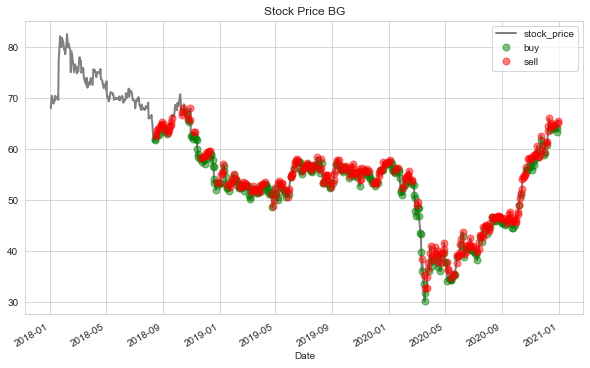

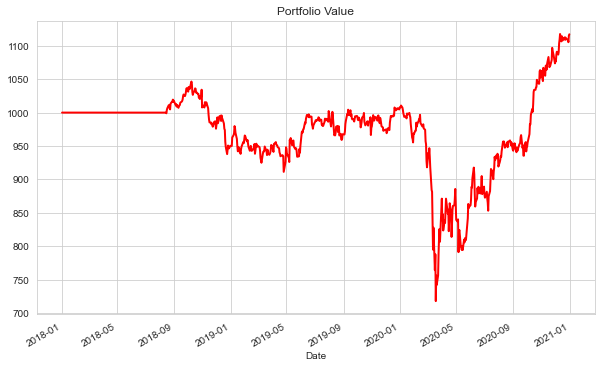

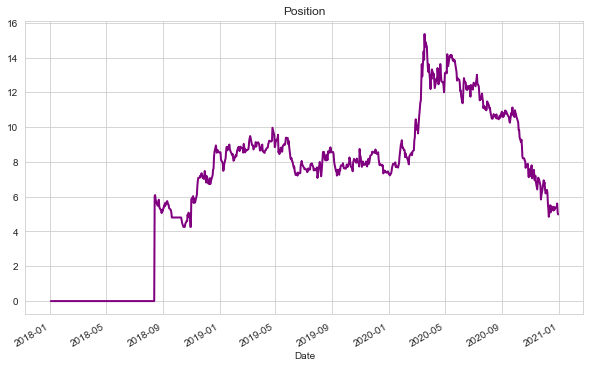

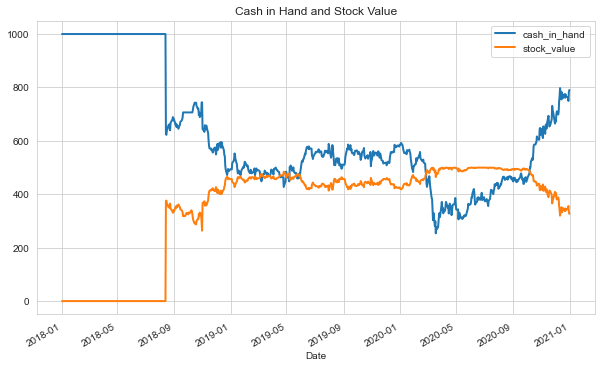

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: BG
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.76 %
Volatility: 0.1733
shape ratio: 0.1535
Maximun drawdown: -31.38 %
Calmar ratio: 0.1198
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -1.20 %
Volatility (benchmark): 0.3479
shape ratio: -0.0660
Maximun drawdown: -63.36 %
Calmar ratio (benchmark): -0.0189


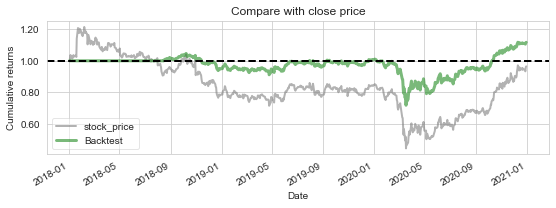

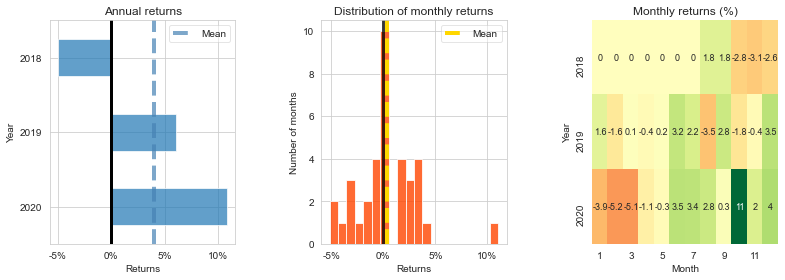

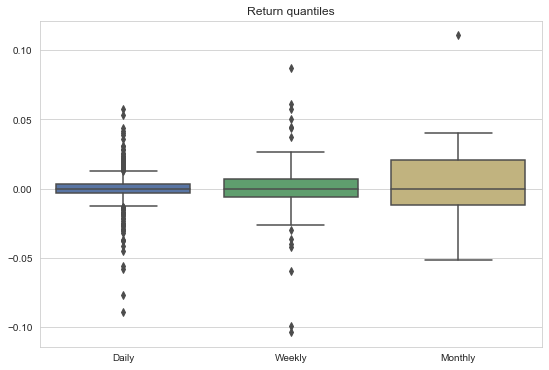

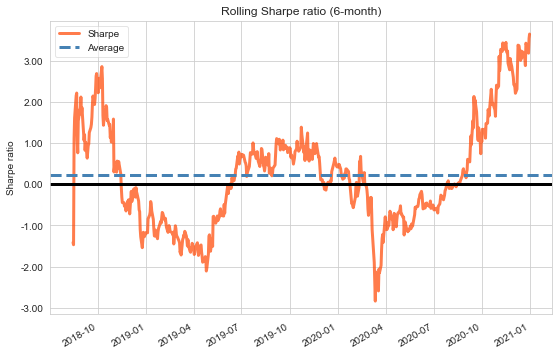

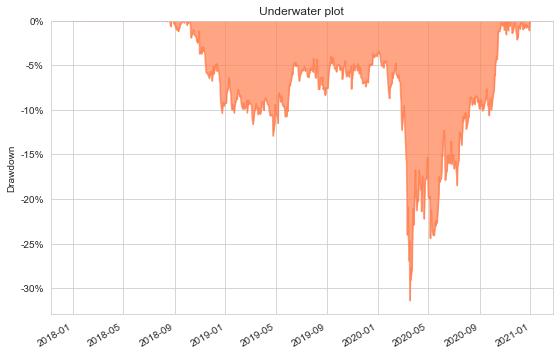

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')